In [267]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

### Ejercicio 1. 
En este ejercicio vamos a usar un fichero de datos relacionados con el **Old Faithful Geyser**. Este fichero contiene datos clásicos del géiser **Old Faithful**, situado en el Parque Nacional de Yellowstone (EE. UU.).   Cada fila del conjunto de datos corresponde a **una erupción observada** del géiser.

El conjunto de datos tiene dos variables:

- **`duracion`**  
  Duración de la erupción, medida en **minutos**.  
  
- **`espera`**  
  Tiempo de espera, en **minutos**, hasta la siguiente erupción tras la observada. 

1. Importa los datos del fichero **`Old_Faithful.csv'** y muestra los primeros datos del mismo.

¿Qué tipo de variables son **duracion** y **espera**?

2. Calcula el histograma y el boxplot de la variable **duracion**. Calcula el histograma y el boxplot de la variable **espera**. ¿Qué interpretación haces de los datos? ¿Qué similitudes y diferencias ves entre ambas variables?

3. Calcula la media y la desviación típica de ambas variables

4. Dibuja la nube de puntos del par de variables **(duracion, espera)**. ¿Qué se observa?

5. Vamos a clasificar **duración** en dos tipos: **"Dur_Corta"** y **"Dur_Larga"** en funcion de que esta sea inferior a 3 minutos (será corta) o superior a 3 minutos (será larga). Haz el corte. 

6. También vamos a clasificar *espera** en dos tipos: **"Esp_Corta"** y **"Esp_Larga"** en funcion de que esta sea inferior a 70 minutos (será corta) o superior a 70 minutos (será larga). Haz el corte. 

7. Quedate solo con las observaciones de tipo **"Dur_Corta"** y haz el histograma de la nueva variable, calcula la media y la desviación típica, y dibuja la nube de puntos asociada. 

8. ¿Existe relación entre la duración de una erupción y el tiempo de espera para la siguiente? Responde haciendo una tabla de contingencia y calculando las probabilidades (o frecuencias) pertinentes.

9. ¿Representa bien los datos la recta de regresión de la **espera** respecto de la **duracion**? ¿Y si calculamos la recta de regresión asociada a los  logaritmos de las variables? ¿Y si usamos 

$$E(d)=a\cdot d^b,$$ 

donde d es la duración, E es la espera y a,b son parámetros a calcular? 

10. ¿Se pueden hacer predicciones razonables de la espera una vez se ha observado la duración de una erupción?

### Ejercicio 2. 

Se dispone del fichero **`janka.csv`**, que contiene datos clásicos sobre propiedades físicas
de distintas maderas (eucaliptos australianos).

Cada observación corresponde a **una especie de madera**.

Las variables del conjunto de datos son:

- **Density**: densidad de la madera.
- **Hardness**: dureza Janka.

La dureza Janka mide la resistencia de la madera a la penetración y se utiliza habitualmente
en estudios de materiales y en ingeniería.



1. Importa el fichero de datos y muestra las primeras observaciones. Indica el tipo de cada variable.
2. Calcula la media, desviación típica, mínimo y máximo de cada variable.
3. Dibuja el histograma de `Hardness` y comenta su forma.
4. Dibuja la nube de puntos `Hardness` frente a `Density` y describe la relación observada.
5. Denotemos por $H$ la dureza (`Hardness`) y por $D$ la densidad (`Density`). Ajusta la recta de regresión lineal simple:
   
   $$\widehat{H} = a \cdot D + b $$
   
   Dibuja la recta de regresión sobre la nube de puntos.
6. Interpreta el coeficiente `a`.
7. Calcula el coeficiente de determinación $R^2$ del modelo.
8. Repite el ajuste utilizando logaritmos:

   $$ \log(\widehat{H}) = c \cdot \log(D) + d $$ 
9. Interpreta el resultado en términos de H y D. 
10. Explica por qué puede ser razonable usar un modelo potencial del tipo
 
 $$\widehat{H} = k \cdot D^\alpha.$$

## Ejercicio 1: Solución (Análisis del dataset Old Faithful).

Lo primero es cargar los paquetes que nos han indicado al inicio de la práctica -y entiendo ya se ha hecho.

* Ahora importo el fichero <strong> Old_Faithful.csv </strong> y muestro los primeros elementos con la orden <strong> df.head </strong> 

In [268]:
df = pd.read_csv('Old_Faithful.csv')
df.head()

,rownames,duracion,espera
0,1,3.600,79
1,2,1.800,54
2,3,3.333,74
3,4,2.283,62
4,5,4.533,85


In [269]:
df.dtypes

rownames      int64
duracion    float64
espera        int64
dtype: object

El dataframe contiene dos variables: duracion y espera. Ambas son continuas cuantitativas. Calculo, para ambas variables, el histograma y el boxplot y los muestro

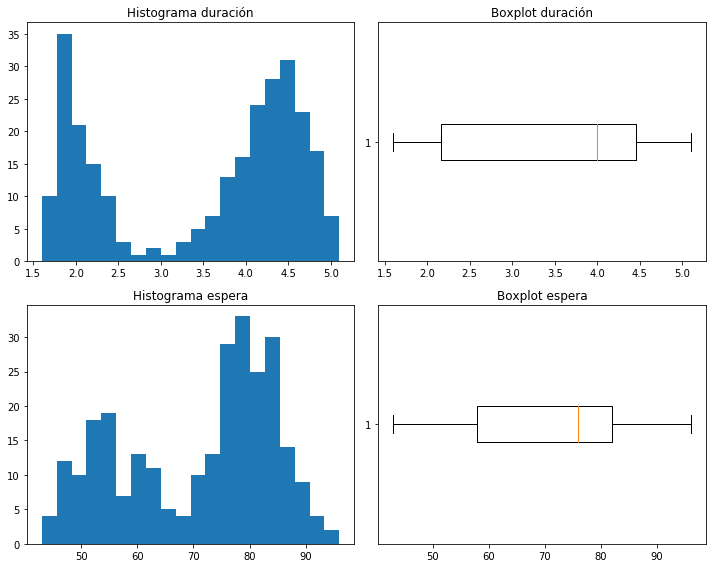

In [270]:

# Histogramas y boxplots
fig, ax = plt.subplots(2,2, figsize=(10,8))

ax[0,0].hist(df['duracion'], bins=20)
ax[0,0].set_title("Histograma duración")

ax[0,1].boxplot(df['duracion'], vert=False)
ax[0,1].set_title("Boxplot duración")

ax[1,0].hist(df['espera'], bins=20)
ax[1,0].set_title("Histograma espera")

ax[1,1].boxplot(df['espera'], vert=False)
ax[1,1].set_title("Boxplot espera")

plt.tight_layout()
plt.show()



Ambas variables parecen bimodales (tienen dos picos bien diferenciados, dos "modas"). Ambas son cuantitativas continuas. Las esperas parecen en general más largas que las duraciones. 

Calculo las medias y desv. típicas:

In [271]:
df[['duracion','espera']].describe().loc[['mean','std']]

,duracion,espera
mean,3.487783,70.897059
std,1.141371,13.594974


Dibujo la nube de puntos (diagrama de dispersión) de duracion frente a espera: 

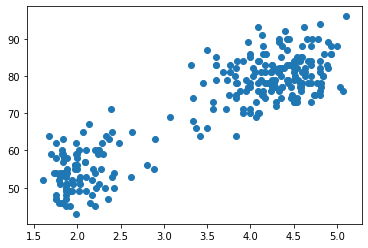

In [272]:
plt.scatter(df['duracion'], df['espera'])
plt.show()


La nube de puntos muestra una clara relación positiva entre duración y tiempo de espera.



Ahora hago los cortes que me piden,  e introduzco las nuevas variables "tipo_duracion" y "tipo_epera" en el dataframe, y lo muestro: 

In [273]:
df['tipo_duracion'] = pd.cut(
    df['duracion'],
    bins=[-np.inf, 3, np.inf],
    labels=['Dur_Corta', 'Dur_Larga'],
    right=False
)


# modo alternativo (pero menos escalable): 
# df['tipo_duracion'] = np.where(df['duracion'] < 3, 'Dur_Corta', 'Dur_Larga')

In [274]:
df['tipo_espera'] = pd.cut(
    df['espera'],
    bins=[-np.inf, 70, np.inf],
    labels=['Esp_Corta', 'Esp_Larga'],
    right=False
)


# modo alternativo (pero menos escalable): 
# df['tipo_espera'] = np.where(df['espera'] < 70, 'Esp_Corta', 'Esp_Larga')


In [275]:
df

,rownames,duracion,espera,tipo_duracion,tipo_espera
0,1,3.600,79,Dur_Larga,Esp_Larga
1,2,1.800,54,Dur_Corta,Esp_Corta
2,3,3.333,74,Dur_Larga,Esp_Larga
3,4,2.283,62,Dur_Corta,Esp_Corta
4,5,4.533,85,Dur_Larga,Esp_Larga
...,...,...,...,...,...
267,268,4.117,81,Dur_Larga,Esp_Larga
268,269,2.150,46,Dur_Corta,Esp_Corta
269,270,4.417,90,Dur_Larga,Esp_Larga
270,271,1.817,46,Dur_Corta,Esp_Corta


Ahora tomo solo las observaciones con tipo_duración = Dur_Corta y dibujo el histograma -que debería ser unimodal, pues hemos separado las duraciones cortas de las largas -y ese era el origen de la bimodalidad-). De paso, calculamos media y desv. típica de la nueva variable.

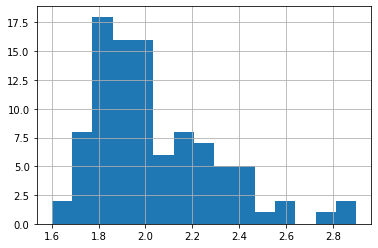

(2.0381340206185565, 0.2668654712922622)

In [276]:
cortas = df[df['tipo_duracion']=="Dur_Corta"]

cortas['duracion'].hist(bins=15)
plt.show()

cortas['duracion'].mean(), cortas['duracion'].std()



Calculo la tabla de contingencia:

In [277]:
 pd.crosstab(df['tipo_duracion'], df['tipo_espera'])

tipo_espera,Esp_Corta,Esp_Larga
tipo_duracion,,
Dur_Corta,96,1
Dur_Larga,7,168


In [278]:
 pd.crosstab(df['tipo_duracion'], df['tipo_espera'], normalize='all')

tipo_espera,Esp_Corta,Esp_Larga
tipo_duracion,,
Dur_Corta,0.352941,0.003676
Dur_Larga,0.025735,0.617647


Otro modo:

In [279]:
n_ij= pd.crosstab(df['tipo_duracion'], df['tipo_espera'])
print(n_ij)

tipo_espera    Esp_Corta  Esp_Larga
tipo_duracion                      
Dur_Corta             96          1
Dur_Larga              7        168


In [280]:
f_ij = n_ij / n_ij.sum().sum()
print(f_ij)

tipo_espera    Esp_Corta  Esp_Larga
tipo_duracion                      
Dur_Corta       0.352941   0.003676
Dur_Larga       0.025735   0.617647


Está clara la fuerte dependencia entre los tipos de espera y tipos de duración. Esto se ve  en las tablas de contingencia, pero también en los diagramas de barras:

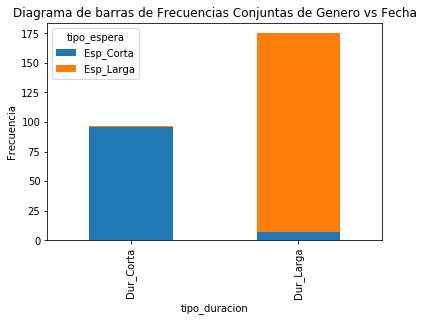

In [281]:
n_ij.plot(kind='bar', stacked=True)
plt.title('Diagrama de barras de Frecuencias Conjuntas de Genero vs Fecha')
plt.ylabel('Frecuencia')
plt.show()

In [282]:
# Tablas de frecuencias condicionadas

# Frecuencias condicionadas por columnas (Tipo de Duración condicionada a Tipo de Espera)
cond_columnas = n_ij.div(n_ij.sum(axis=0), axis=1)
print(cond_columnas)

tipo_espera    Esp_Corta  Esp_Larga
tipo_duracion                      
Dur_Corta       0.932039   0.005917
Dur_Larga       0.067961   0.994083


In [283]:
# Tablas de frecuencias condicionadas

# Frecuencias condicionadas por filas (Tipo de Espera condicionada a Tipo de Duración)
cond_columnas = n_ij.div(n_ij.sum(axis=1), axis=0)
print(cond_columnas)

tipo_espera    Esp_Corta  Esp_Larga
tipo_duracion                      
Dur_Corta       0.989691   0.010309
Dur_Larga       0.040000   0.960000


Claramente, la duración corta conlleva una espera más corta y la duración larga, una espera más larga. 

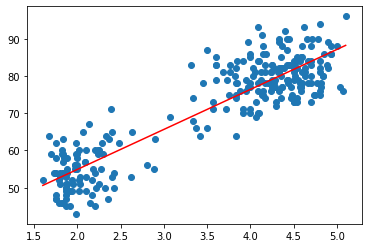

0.8114607609733095

In [284]:
# Regresión lineal
coef = np.polyfit(df['duracion'], df['espera'], 1)
x = np.linspace(df['duracion'].min(), df['duracion'].max())
y = coef[0]*x + coef[1]

plt.scatter(df['duracion'], df['espera'])
plt.plot(x, y,color='red')
plt.show()



# R^2

pred_lin = coef[0] * df['duracion']+coef[1]
ss_res_lin = np.sum((df['espera'] - pred_lin)**2)
ss_tot = np.sum((df['espera'] - df['espera'].mean())**2)
r2_lin = 1 - ss_res_lin / ss_tot

r2_lin


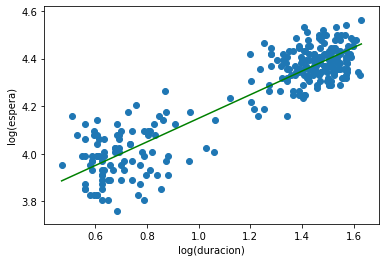

0.8217168825956754

In [285]:
# Modelo logaritmico (log-log) 

log_d = np.log(df['duracion'])
log_e = np.log(df['espera'])

coef_log = np.polyfit(log_d, log_e, 1)
coef_log


x = np.linspace(log_d.min(), log_d.max())
y_log = coef_log[0] * x + coef_log[1]

plt.scatter(log_d, log_e)
plt.plot(x, y_log, color='green')
plt.xlabel("log(duracion)")
plt.ylabel("log(espera)")
plt.show()


pred_log = coef_log[0] * log_d + coef_log[1]

ss_res_log = np.sum((log_e - pred_log)**2)
ss_tot_log = np.sum((log_e - log_e.mean())**2)

r2_log = 1 - ss_res_log / ss_tot_log
r2_log


No ha habido una mejora sustancial (el coef de determinación es ligeramente mayor, pero ya está). 

Nótese que $\log(E)=a+ b\log(D)$ equivale a $E=\exp(\log(E))=\exp(a+\log(D)b)=\exp(a)\cdot D^b$, por lo que en realidad estamos aproximando $E$ como una función potencial de $D$. Por tanto, podemos hacer la representación en términos de $D$ y $E$ y obtener el coeficiente de determinación midiendo los errores en dicha representación. Eso da un valor distinto del obtenido antes (en el modelo log-log). 

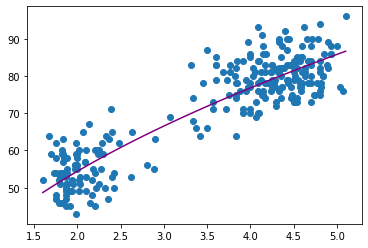

0.81649683345546

In [286]:
# Modelo potencial: E(d)=a*d^b

a = np.exp(coef_log[1])
b = coef_log[0]

x = np.linspace(df['duracion'].min(), df['duracion'].max())
y_pot = a * x**b

plt.scatter(df['duracion'], df['espera'])
plt.plot(x, y_pot, color='purple')
plt.show()


# R^2

pred_pot = a * df['duracion']**b

ss_res_pot = np.sum((df['espera'] - pred_pot)**2)
ss_tot = np.sum((df['espera'] - df['espera'].mean())**2)

r2_pot = 1 - ss_res_pot / ss_tot
r2_pot


De nuevo la mejora es ínfima.

In [287]:
pd.DataFrame({
    'Modelo': ['Lineal', 'Logarítmico', 'Potencial'],
    'R^2': [r2_lin, r2_log, r2_pot]
})


,Modelo,R^2
0,Lineal,0.811461
1,Logarítmico,0.821717
2,Potencial,0.816497


 

<strong> Ninguno de los modelos es bueno, más allá de predecir una tendencia general. No sirven para predicciones puntuales. </strong> . 

---


## Ejercicio 2. Solución.

In [296]:
df = pd.read_csv("janka.csv")
df.head()



,Density,Hardness
0,24.7,484
1,24.8,427
2,27.3,413
3,28.4,517
4,28.4,549


In [297]:
df.describe().loc[["mean", "std", "min", "max"]]

,Density,Hardness
mean,45.733333,1469.472222
std,13.580090,801.517150
min,24.700000,413.000000
max,69.100000,3260.000000


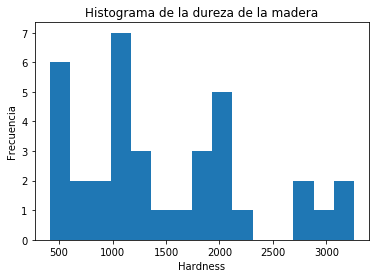

In [298]:
plt.hist(df["Hardness"], bins=15)
plt.xlabel("Hardness")
plt.ylabel("Frecuencia")
plt.title("Histograma de la dureza de la madera")
plt.show()

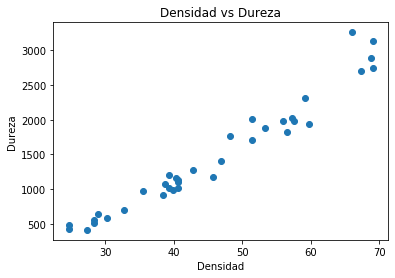

In [299]:
plt.scatter(df["Density"], df["Hardness"])
plt.xlabel("Densidad")
plt.ylabel("Dureza")
plt.title("Densidad vs Dureza")
plt.show()

In [300]:
coef_hard = np.polyfit(df["Density"], df["Hardness"], 1)
coef_hard



array([   57.50667476, -1160.49970366])

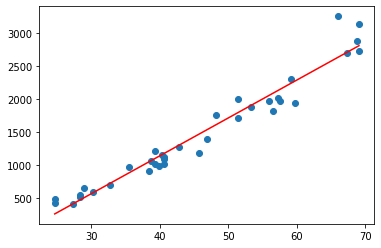

In [301]:
x = np.linspace(df["Density"].min(), df["Density"].max(), 100)
y = coef_hard[0]*x + coef_hard[1]

plt.scatter(df["Density"], df["Hardness"])
plt.plot(x, y, color="red")
plt.show()

In [302]:

df[["Density", "Hardness"]].corr()

,Density,Hardness
Density,1.000000,0.974335
Hardness,0.974335,1.000000


In [303]:
pred_lin = coef_hard[0] * df['Density']+coef_hard[1]
ss_res_lin = np.sum((df['Hardness'] - pred_lin)**2)
ss_tot = np.sum((df['Hardness'] - df['Hardness'].mean())**2)
r2_lin = 1 - ss_res_lin / ss_tot

r2_lin



0.9493278007487129

En este caso la recta de regresión es mucho más representativa de la realidad descrita por los datos y podría usarse para realizar predicciones. Es claro que a mayor densidad, mayor dureza de la madera.  

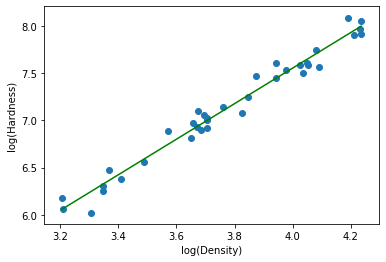

0.973130208147175

In [304]:
# Modelo logaritmico (log-log) 

log_d = np.log(df['Density'])
log_e = np.log(df['Hardness'])

coef_log = np.polyfit(log_d, log_e, 1)
coef_log


x = np.linspace(log_d.min(), log_d.max())
y_log = coef_log[0] * x + coef_log[1]

plt.scatter(log_d, log_e)
plt.plot(x, y_log, color='green')
plt.xlabel("log(Density)")
plt.ylabel("log(Hardness)")
plt.show()


pred_log = coef_log[0] * log_d + coef_log[1]

ss_res_log = np.sum((log_e - pred_log)**2)
ss_tot_log = np.sum((log_e - log_e.mean())**2)

r2_log = 1 - ss_res_log / ss_tot_log
r2_log


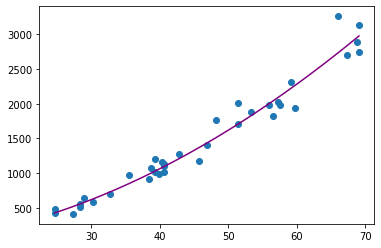

0.9614502474286879

In [305]:
# Modelo potencial: E(d)=a*d^b

a = np.exp(coef_log[1])
b = coef_log[0]

x = np.linspace(df['Density'].min(), df['Density'].max())
y_pot = a * x**b

plt.scatter(df['Density'], df['Hardness'])
plt.plot(x, y_pot, color='purple')
plt.show()


# R^2

pred_pot = a * df['Density']**b

ss_res_pot = np.sum((df['Hardness'] - pred_pot)**2)
ss_tot = np.sum((df['Hardness'] - df['Hardness'].mean())**2)

r2_pot = 1 - ss_res_pot / ss_tot
r2_pot


Está claro que la mejor representación es log-log, y luego su versión potencial. En este caso sí hay cierto poder predictivo de los modelos. La razón podría ser de tipo físico (existe una verdadera relación potencial entre densidad y dureza de la madera). 